KERNEL SVM in this case data is not linearly seperable so what we do is add another dimension to make data linearly seperable and we add kernel 
trick to make it more computaional easy

in 1d linear seperable is dot---------------------------------------------------------------------------------------
in 2d linear seperable is line---------------------------------------------------------------------------------------
in 3d linear seperable is hyper plane---------------------------------------------------------------------------------

mapping to a higher dimension can be computationally intensive so we add kernel trick

we use RBF KERNEL to classify-------------------------------------------------------------------------------------
types of kernel functions------------------------------------------------------------------------------------------
radial basis functons -rbf kernel(taking circular bits of varying radii)-------------------------------------------------------
sigmoid kernel(one side is 0 another side is one)------------------------------------------------------------------------
polynomial kernel(one side upto some length is 0 another side upto certain length is 1)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Social_Network_Ads.csv')
data.head()
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values


In [2]:
from sklearn.cross_validation import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
trainx=sc.fit_transform(trainx)
testx=sc.transform(testx)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
#create our kernel svm classifier
from sklearn.svm import SVC
clf=SVC(kernel='rbf',random_state=0)
clf.fit(trainx,trainy)
pre=clf.predict(testx)

In [5]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(testy,pre)
cm=confusion_matrix(testy,pre)

In [6]:
score

0.8875

In [7]:
cm

array([[47,  8],
       [ 1, 24]], dtype=int64)

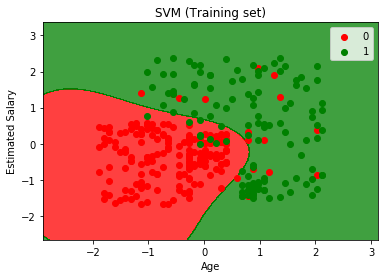

In [9]:
# skip visualization
from matplotlib.colors import ListedColormap
X_set, y_set = trainx, trainy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


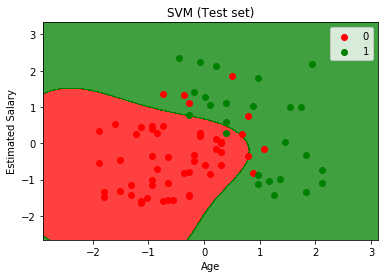

In [10]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = testx, testy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()